# MNIST


## Preprocessing


In [2]:
import idx2numpy
train_images = idx2numpy.convert_from_file('train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
test_images = idx2numpy.convert_from_file('t10k-images-idx3-ubyte.unknown')
test_labels = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte.unknown')

In [3]:
import numpy as np

img_preprocessed_train = np.array([img.flatten() for img in train_images])
img_preprocessed_test = np.array([img.flatten() for img in test_images])

In [4]:
img_preprocessed = np.concatenate(
    (img_preprocessed_train, img_preprocessed_test), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

In [5]:
import pandas as pd
df_minst = pd.DataFrame(img_preprocessed)
df_minst['labels'] = labels

In [6]:
df_minst_x = df_minst.drop('labels', axis=1)

In [7]:
df_minst_x = df_minst_x[:20000]
df_minst_x_mean = df_minst_x.mean(axis=0)
df_minst_x_std = df_minst_x.std(axis=0)

df_minst_x_norm = (df_minst_x - df_minst_x_mean) / df_minst_x_std
df_minst_x_norm

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.031855,-0.027449,-0.019555,-0.016876,-0.014285,-0.007071,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.031855,-0.027449,-0.019555,-0.016876,-0.014285,-0.007071,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.031855,-0.027449,-0.019555,-0.016876,-0.014285,-0.007071,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.031855,-0.027449,-0.019555,-0.016876,-0.014285,-0.007071,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.031855,-0.027449,-0.019555,-0.016876,-0.014285,-0.007071,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.031855,-0.027449,-0.019555,-0.016876,-0.014285,-0.007071,NaN,NaN,NaN,NaN
19996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.031855,-0.027449,-0.019555,-0.016876,-0.014285,-0.007071,NaN,NaN,NaN,NaN
19997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.031855,-0.027449,-0.019555,-0.016876,-0.014285,-0.007071,NaN,NaN,NaN,NaN
19998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.031855,-0.027449,-0.019555,-0.016876,-0.014285,-0.007071,NaN,NaN,NaN,NaN


In [8]:
df_minst_x_norm.fillna(0, inplace=True)

## Euclidean Distance using Library


In [10]:
from sklearn.metrics.pairwise import euclidean_distances

ecludian_distance_matrix = euclidean_distances(df_minst_x_norm)
ecludian_distance_df = pd.DataFrame(
    ecludian_distance_matrix, index=df_minst_x_norm.index, columns=df_minst_x_norm.index)
ecludian_distance_df

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.000000,34.693959,56.210699,34.256050,38.746480,37.114450,34.014511,31.567619,33.469105,35.918140,...,44.668685,33.550218,37.083857,97.220751,32.933984,40.337384,39.611264,33.550421,35.976199,66.720957
1,34.693959,0.000000,51.849958,27.371391,30.467599,28.815110,28.331249,27.077463,26.896310,30.426087,...,34.014033,27.847927,30.196406,93.968964,26.478023,36.271147,30.679281,28.606707,27.214149,63.060286
2,56.210699,51.849958,0.000000,49.826916,52.106600,51.715797,49.905560,50.975817,49.030930,49.767051,...,54.116842,49.870949,49.015759,102.873582,49.781266,51.285715,52.333648,50.332702,49.877448,75.702407
3,34.256050,27.371391,49.826916,0.000000,27.587832,27.151721,22.605270,25.886744,20.458220,26.713013,...,36.143071,21.960901,26.632729,92.817420,24.815681,32.150234,30.366093,23.468904,21.640308,59.785454
4,38.746480,30.467599,52.106600,27.587832,0.000000,29.689826,26.237075,31.112616,24.087978,30.331193,...,39.870633,25.516038,27.965980,94.101150,29.264692,34.441501,35.556118,26.394216,24.929259,63.057195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40.337384,36.271147,51.285715,32.150234,34.441501,34.979427,31.924133,33.694301,31.229190,35.478419,...,43.804937,32.128416,25.267825,94.044660,29.817829,0.000000,35.282980,32.447620,30.944243,64.587005
19996,39.611264,30.679281,52.333648,30.366093,35.556118,32.790405,30.084896,34.026709,28.764288,34.331208,...,37.151092,29.357948,33.318200,91.921014,28.900475,35.282980,0.000000,29.907698,31.317606,62.670173
19997,33.550421,28.606707,50.332702,23.468904,26.394216,28.054682,10.341318,28.269274,13.083620,26.767355,...,37.487705,6.833590,26.116140,93.052374,22.504471,32.447620,29.907698,0.000000,21.229000,60.668913
19998,35.976199,27.214149,49.877448,21.640308,24.929259,26.661044,20.015216,28.367953,19.181332,26.629458,...,36.420045,20.601575,23.833296,92.233196,24.803564,30.944243,31.317606,21.229000,0.000000,60.248332


## Euclidean Distance using own code


In [11]:
def euclidean_distances(mat):
    from tqdm import tqdm

    if isinstance(mat, (pd.DataFrame, pd.Series)):
        mat = mat.to_numpy()

    dot_product = np.dot(mat, mat.T)
    xi2 = np.sum(mat**2, axis=1)
    n = len(xi2)
    distances = np.zeros((n, n))

    for i in tqdm(range(n)):
        for j in range(n):
            distances[i, j] = np.sqrt(
                xi2[i] + xi2[j] - (2 * dot_product[i, j]))

    return distances


distances = euclidean_distances(df_minst_x_norm)

  0%|          | 5/20000 [00:00<07:49, 42.60it/s]/tmp/ipykernel_155192/3567368365.py:14: RuntimeWarning: invalid value encountered in sqrt
  distances[i, j] = np.sqrt(xi2[i] + xi2[j] - (2 * dot_product[i, j]))
100%|██████████| 20000/20000 [07:33<00:00, 44.09it/s]


In [12]:
pd.DataFrame(distances)

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,6.743496e-07,3.469396e+01,56.210699,34.256050,38.746480,37.114450,34.014511,31.567619,33.469105,35.918140,...,44.668685,33.550218,37.083857,97.220751,32.933984,4.033738e+01,39.611264,33.550421,35.976199,66.720957
1,3.469396e+01,5.840039e-07,51.849958,27.371391,30.467599,28.815110,28.331249,27.077463,26.896310,30.426087,...,34.014033,27.847927,30.196406,93.968964,26.478023,3.627115e+01,30.679281,28.606707,27.214149,63.060286
2,5.621070e+01,5.184996e+01,0.000000,49.826916,52.106600,51.715797,49.905560,50.975817,49.030930,49.767051,...,54.116842,49.870949,49.015759,102.873582,49.781266,5.128572e+01,52.333648,50.332702,49.877448,75.702407
3,3.425605e+01,2.737139e+01,49.826916,0.000000,27.587832,27.151721,22.605270,25.886744,20.458220,26.713013,...,36.143071,21.960901,26.632729,92.817420,24.815681,3.215023e+01,30.366093,23.468904,21.640308,59.785454
4,3.874648e+01,3.046760e+01,52.106600,27.587832,0.000000,29.689826,26.237075,31.112616,24.087978,30.331193,...,39.870633,25.516038,27.965980,94.101150,29.264692,3.444150e+01,35.556118,26.394216,24.929259,63.057195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.033738e+01,3.627115e+01,51.285715,32.150234,34.441501,34.979427,31.924133,33.694301,31.229190,35.478419,...,43.804937,32.128416,25.267825,94.044660,29.817829,4.768372e-07,35.282980,32.447620,30.944243,64.587005
19996,3.961126e+01,3.067928e+01,52.333648,30.366093,35.556118,32.790405,30.084896,34.026709,28.764288,34.331208,...,37.151092,29.357948,33.318200,91.921014,28.900475,3.528298e+01,NaN,29.907698,31.317606,62.670173
19997,3.355042e+01,2.860671e+01,50.332702,23.468904,26.394216,28.054682,10.341318,28.269274,13.083620,26.767355,...,37.487705,6.833590,26.116140,93.052374,22.504471,3.244762e+01,29.907698,NaN,21.229000,60.668913
19998,3.597620e+01,2.721415e+01,49.877448,21.640308,24.929259,26.661044,20.015216,28.367953,19.181332,26.629458,...,36.420045,20.601575,23.833296,92.233196,24.803564,3.094424e+01,31.317606,21.229000,NaN,60.248332


## Cosine


In [13]:
import numpy as np


def cosine_similarity_custom(mat):

    if isinstance(mat, (pd.DataFrame, pd.Series)):
        mat = mat.to_numpy()

    dot_product = np.dot(mat, mat.T)
    norms = np.linalg.norm(mat, axis=1)
    cosine_similarity_matrix = dot_product / np.outer(norms, norms)
    return cosine_similarity_matrix


distances = cosine_similarity_custom(df_minst_x_norm)
pd.DataFrame(distances)

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,1.000000,0.070415,-0.032178,-0.014133,-0.094737,-0.044743,-0.009411,0.253986,-0.017570,0.045250,...,-0.046723,0.015908,-0.064088,-0.047863,0.094706,-0.023469,-0.048097,0.035406,-0.156811,-0.052490
1,0.070415,1.000000,-0.061758,-0.131651,-0.054532,-0.005386,-0.236915,0.093315,-0.197580,-0.087230,...,0.199885,-0.208900,-0.137125,-0.037225,-0.024329,-0.210926,0.062169,-0.236631,-0.144654,-0.087938
2,-0.032178,-0.061758,1.000000,-0.023960,-0.025275,-0.034097,-0.037560,-0.003831,-0.009332,0.079021,...,0.088866,-0.040783,0.096713,-0.012356,-0.006872,0.099850,0.019987,-0.056645,-0.037763,-0.032243
3,-0.014133,-0.131651,-0.023960,1.000000,-0.011421,-0.057434,0.025105,0.016312,0.130756,0.014887,...,-0.022778,0.066784,-0.053161,-0.015913,-0.105714,-0.077922,-0.059076,-0.026736,0.101797,0.037503
4,-0.094737,-0.054532,-0.025275,-0.011421,1.000000,0.036950,0.074891,-0.078189,0.183256,0.022371,...,-0.064201,0.119075,0.122955,-0.017541,-0.110058,-0.002542,-0.159249,0.078730,0.166748,-0.044352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.023469,-0.210926,0.099850,-0.077922,-0.002542,-0.086600,-0.076349,-0.022274,-0.082733,-0.092427,...,-0.122304,-0.102024,0.437576,0.031905,0.109374,1.000000,0.046084,-0.099295,-0.006878,-0.031067
19996,-0.048097,0.062169,0.019987,-0.059076,-0.159249,-0.037535,-0.053650,-0.138045,-0.010726,-0.110268,...,0.153607,-0.008332,-0.097932,0.101793,0.072107,0.046084,1.000000,-0.024008,-0.154041,0.019823
19997,0.035406,-0.236631,-0.056645,-0.026736,0.078730,-0.129777,0.796431,-0.176481,0.648903,0.011606,...,-0.116993,0.910402,-0.010911,-0.030313,0.091795,-0.099295,-0.024008,1.000000,0.136665,-0.018082
19998,-0.156811,-0.144654,-0.037763,0.101797,0.166748,-0.040982,0.214008,-0.213619,0.212200,0.000580,...,-0.057504,0.155043,0.142922,0.015921,-0.134310,-0.006878,-0.154041,0.136665,1.000000,0.000714


# KNN Classifier MNIST


## Library Implementation


In [51]:
X = df_minst_x_norm
y = np.concatenate((train_labels, test_labels), axis=0)

In [52]:
X_sub = X[:5000]
y_sub = y[:5000]

In [53]:
# This is train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_sub, y_sub, test_size=0.1, random_state=42)

In [54]:
# This is validation split
from sklearn.model_selection import train_test_split
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42)

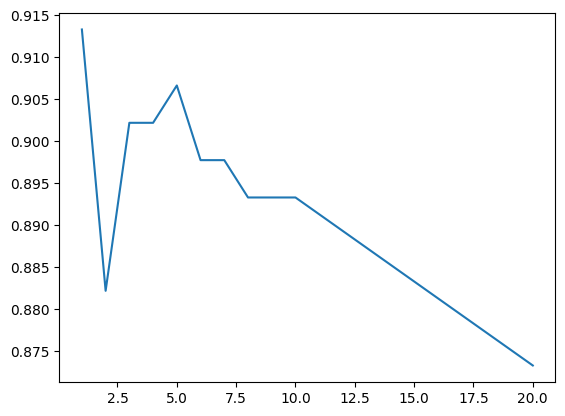

In [55]:
# cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_vals = [i for i in range(1, 11)] + [20]
accuracies = []
for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_val, y_train_val)
    y_pred = knn.predict(X_test_val)
    acc = accuracy_score(y_test_val, y_pred)
    accuracies.append(acc)

plt.plot(k_vals, accuracies)

In [56]:
# final accuracy
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.908

## Own Implementation


In [58]:
# custom model
class KNNClassifier():
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def calculate_euclidian_similarity_btn_train_test(self, X_train, X_test):
        from tqdm import tqdm
        import os
        import numpy as np

        n = X_train.shape[0]
        m = X_test.shape[0]
        X_train = X_train.to_numpy()
        X_test = X_test.to_numpy()
        distances = np.zeros((m, n))

        for row1 in tqdm(range(m), unit="row"):
            for row2 in range(n):
                distances[row1, row2] = np.sqrt(
                    np.sum((X_train[row2] - X_test[row1]) ** 2))
        return distances

    def predict(self, X_test):
        from scipy.stats import mode
        n = X_test.shape[0]
        predicted_labels = []

        distance = self.calculate_euclidian_similarity_btn_train_test(
            self.X_train, X_test)
        distance1 = distance
        for row in range(n):
            current_data_point = distance[row]
            smallest_indices = np.argpartition(
                current_data_point, self.k)[:self.k]
            labels = self.y_train[smallest_indices]
            classified_label = np.uint8(mode(labels).mode[0])
            predicted_labels.append(classified_label)

        predicted_labels = np.array(predicted_labels, dtype=np.uint8)
        return predicted_labels

100%|██████████| 450/450 [00:11<00:00, 37.92row/s]
/tmp/ipykernel_155192/608426887.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  classified_label = np.uint8(mode(labels).mode[0])


Accuracy for k 20 is 0.9133333333333333


100%|██████████| 450/450 [00:11<00:00, 38.02row/s]
/tmp/ipykernel_155192/608426887.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  classified_label = np.uint8(mode(labels).mode[0])


Accuracy for k 20 is 0.8822222222222222


100%|██████████| 450/450 [00:11<00:00, 38.26row/s]
/tmp/ipykernel_155192/608426887.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  classified_label = np.uint8(mode(labels).mode[0])


Accuracy for k 20 is 0.9022222222222223


100%|██████████| 450/450 [00:11<00:00, 38.49row/s]
/tmp/ipykernel_155192/608426887.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  classified_label = np.uint8(mode(labels).mode[0])


Accuracy for k 20 is 0.9022222222222223


100%|██████████| 450/450 [00:11<00:00, 38.04row/s]
/tmp/ipykernel_155192/608426887.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  classified_label = np.uint8(mode(labels).mode[0])


Accuracy for k 20 is 0.9066666666666666


100%|██████████| 450/450 [00:11<00:00, 38.61row/s]
/tmp/ipykernel_155192/608426887.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  classified_label = np.uint8(mode(labels).mode[0])


Accuracy for k 20 is 0.8977777777777778


100%|██████████| 450/450 [00:11<00:00, 38.17row/s]
/tmp/ipykernel_155192/608426887.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  classified_label = np.uint8(mode(labels).mode[0])


Accuracy for k 20 is 0.8977777777777778


100%|██████████| 450/450 [00:11<00:00, 38.39row/s]
/tmp/ipykernel_155192/608426887.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  classified_label = np.uint8(mode(labels).mode[0])


Accuracy for k 20 is 0.8933333333333333


100%|██████████| 450/450 [00:11<00:00, 37.75row/s]
/tmp/ipykernel_155192/608426887.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  classified_label = np.uint8(mode(labels).mode[0])


Accuracy for k 20 is 0.8933333333333333


100%|██████████| 450/450 [00:11<00:00, 37.70row/s]
/tmp/ipykernel_155192/608426887.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  classified_label = np.uint8(mode(labels).mode[0])


Accuracy for k 20 is 0.8933333333333333


100%|██████████| 450/450 [00:11<00:00, 38.34row/s]
/tmp/ipykernel_155192/608426887.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  classified_label = np.uint8(mode(labels).mode[0])


Accuracy for k 20 is 0.8733333333333333


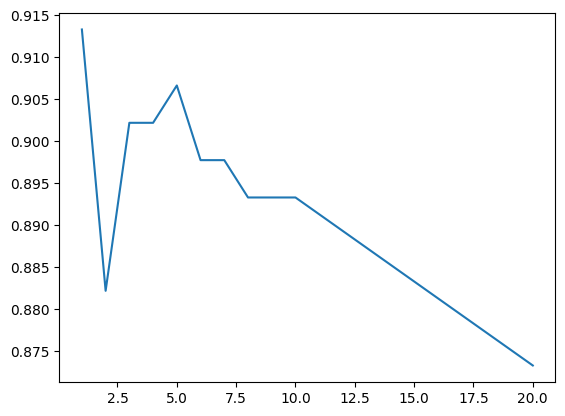

In [60]:
# cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_vals = [i for i in range(1, 11)] + [20]
accuracies = []
for k1 in k_vals:
    knn = KNNClassifier(k=k1)
    knn.fit(X_train_val, y_train_val)
    y_pred = knn.predict(X_test_val)
    acc = accuracy_score(y_test_val, y_pred)
    accuracies.append(acc)
    print("Accuracy for k", k1, 'is', acc)

plt.plot(k_vals, accuracies)

In [61]:
knn = KNNClassifier(k=30)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

100%|██████████| 500/500 [00:14<00:00, 34.18row/s]
/tmp/ipykernel_155192/608426887.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  classified_label = np.uint8(mode(labels).mode[0])


0.884